## Graphs of memory througput measured during load tests
This notebook creates the graphs of the memory throughput measured while running a CPu and memory intensive workload using test_Spark_CPU_memory_sparkmeasure.py  
Measurements were taken using OS tools, notably AMD uProf (“MICRO-prof”). See also https://github.com/LucaCanali/Miscellaneous/blob/master/Performance_Testing/Tools_Linux_Memory_Perf_Measure.md
Performance data is for testing servers of the types: HDP6 and RAC55.  

We don't report the exact CPU model in this doc.
We omit the configuration of networking and I/O, as not relevant for these tests.  
The servers were all installed with the same OS version: RHEL 7.9.  
Systems:  
---

HDP6:

    32 physical cores (2 sockets, 16 physical cores each),  
      64 logical cores visible on the OS due to hyperthreading
    CPU max freq: 3.0 GHz
    CPU from 2017, architecture Zen 2
    L1 caches: 32K + 32K, L2 cache 512K, L3 cache 16384K
    RAM: DDR4, 512 GB

RAC55:

    16 physical cores (2 sockets, 8 physical cores each), 
      32 logical cores visible on the OS due to hyperthreading
    CPU max freq: 4.2 GHz
    CPU from 2019, Architecture Zen 3
    L1 caches: 32K + 32K, L2 cache 512K, L3 cache 32768K
    RAM: DDR4, 1 TB
 

In [1]:
# This notebook uses pandas to read and process Data in csv format
import pandas as pd

In [2]:
# Path to the data
# Data comes from the output of the tool test_Spark_CPU_memory_sparkmeasure.py  
# See https://github.com/LucaCanali/Miscellaneous/tree/master/Perf_Testing
PATH = "../Data/"

In [11]:
data = []
data.append({'key': 'HDP6', 'val': pd.read_csv(PATH + "memory_throughput_HDP6.csv", sep = ',')})
data.append({'key': 'RAC55', 'val': pd.read_csv(PATH + "memory_throughput_RAC55.csv", sep = ',')})

In [12]:
data[0].get('val').head()

,Num_concurrent_tasks,Memory_throughput_GBs
0,72,179
1,64,178
2,56,170
3,48,158
4,40,149


In [13]:
data[0].get('val').columns

Index(['Num_concurrent_tasks', 'Memory_throughput_GBs'], dtype='object')

In [14]:
# Common code for Graphs setup and configuration

import matplotlib.pyplot as plt
plt.clf()
plt.style.use('default')

width = 12
height = 5

node_config = {1: {'name': 'HDP6', 'linestyle': 'solid', 'color': 'black', 'alpha': 1.0, 'linewidth': 3}, 
               2: {'name': 'RAC55', 'linestyle': 'solid', 'color': 'red', 'alpha': 1.0, 'linewidth': 3}
              }


<Figure size 640x480 with 0 Axes>

### Plot measured memory througput as a function of number of concurrent workers
This was measured using OS tools while the the memory-intensive tests were running.  
Measurements were taken on AMD systems using AMD uProf (“MICRO-prof”) tool:  
`/opt/AMDuProf_4.0-341/bin/AMDuProfPcm -m memory -a -d 20 -C -A system`

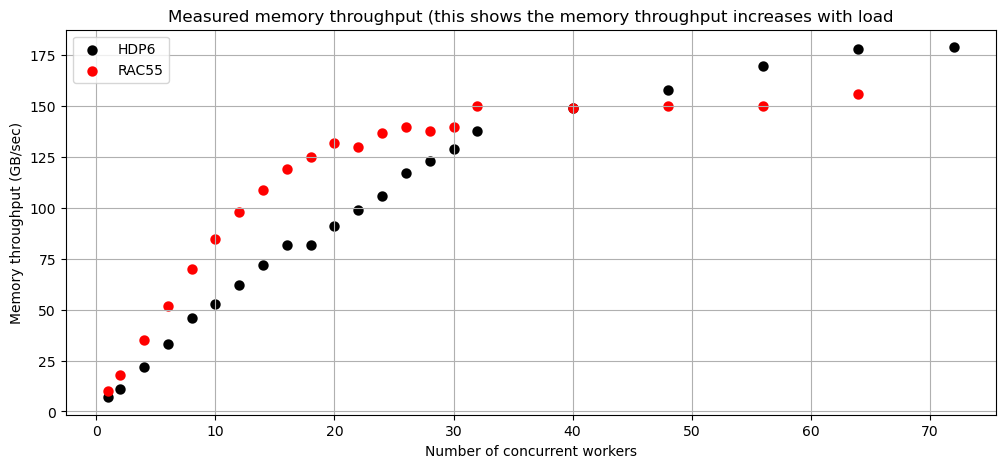

In [15]:
# Job duration
fig, ax = plt.subplots(figsize=(width, height))

for i, measurement in enumerate(data):
    df = measurement.get('val')
    instance = i + 1
    df.plot(kind='scatter', x='Num_concurrent_tasks', y='Memory_throughput_GBs', ax=ax, 
               linestyle=node_config[instance]['linestyle'],
               color=node_config[instance]['color'],
               alpha=node_config[instance]['alpha'],
               linewidth=node_config[instance]['linewidth'],
               label=node_config[instance]['name'])

ax.set_title("Measured memory throughput (this shows the memory throughput increases with load")
#ax.set_ylim([20, 40])
ax.set_xlabel('Number of concurrent workers')
ax.set_ylabel('Memory throughput (GB/sec)')

ax.grid()
plt.show()